# Task 3 - Retail Dataset Exploratory Data Analysis (EDA)

In [27]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.size"] = 13

%matplotlib inline

## Loading and Preparing the Dataset

In [5]:
pd.set_option("display.max_columns", 25)

In [6]:
retail = pd.read_csv(os.path.join("SampleSuperstore.csv"))
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
assert retail.isna().sum().sum() == 0

In [10]:
retail["Postal Code"] = retail["Postal Code"].astype(np.object_)

In [11]:
retail.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Exploratory Data Analysis EDA

### Uni Variante Analysis

In [21]:
ship_mode_counts = retail["Ship Mode"].value_counts().sort_values()
ship_mode_counts

Same Day           543
First Class       1538
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64

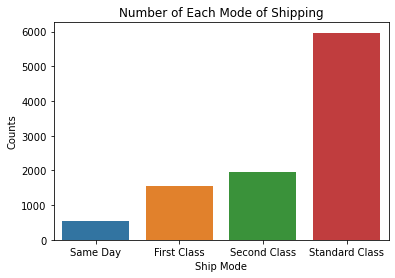

In [34]:
sns.countplot(x="Ship Mode", data=retail, order=ship_mode_counts.index);
plt.xlabel("Ship Mode")
plt.ylabel("Counts")
plt.title("Number of Each Mode of Shipping");

In [29]:
category_counts = retail["Category"].value_counts().sort_values()
category_counts

Technology         1847
Furniture          2121
Office Supplies    6026
Name: Category, dtype: int64

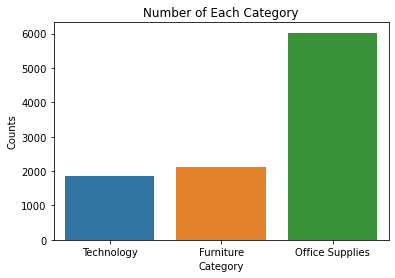

In [35]:
sns.countplot(x="Category", data=retail, order=category_counts.index)
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Number of Each Category");

In [37]:
retail["Country"].unique()

array(['United States'], dtype=object)

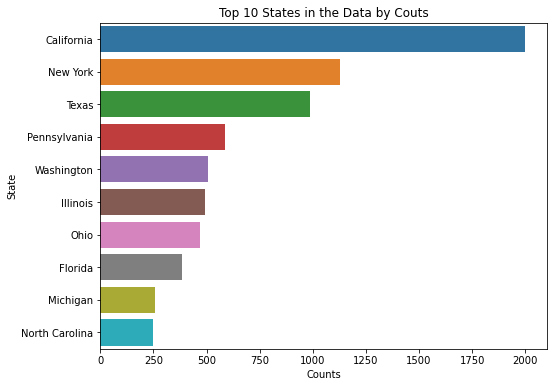

In [58]:
top_10_states = (
    retail["State"].value_counts().nlargest(10)
    .reset_index().rename(columns={"index": "State", "State": "Counts"})
)

# print(top_10_states)

plt.figure(figsize=(8, 6))
sns.barplot(y="State", x="Counts", data=top_10_states)
plt.xlabel("Counts")
plt.ylabel("State");
plt.title("Top 10 States in the Data by Couts");

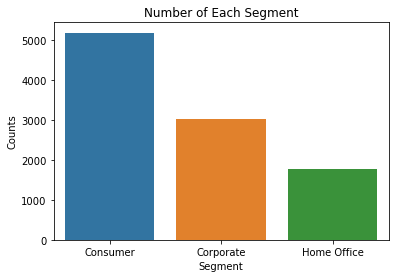

In [76]:
sns.countplot(x="Segment", data=retail);
plt.xlabel("Segment")
plt.ylabel("Counts")
plt.title("Number of Each Segment");

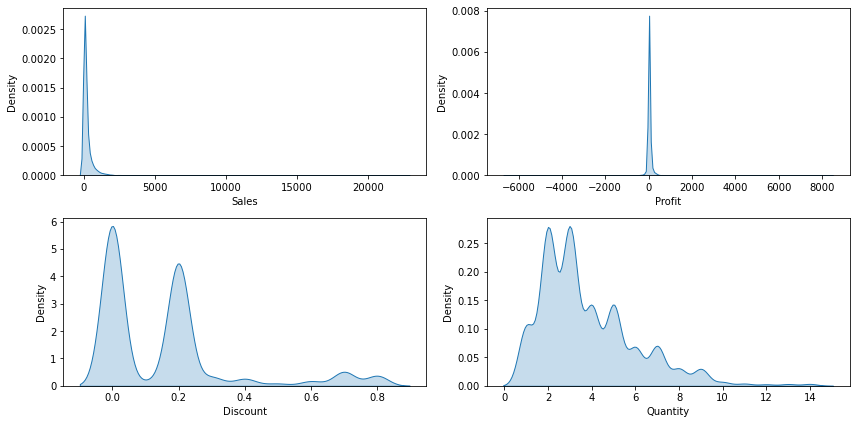

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.kdeplot(x="Sales", data=retail, shade=True, ax=axes[0, 0]);
sns.kdeplot(x="Profit", data=retail, shade=True, ax=axes[0, 1]);
sns.kdeplot(x="Discount", data=retail, shade=True, ax=axes[1, 0]);
sns.kdeplot(x="Quantity", data=retail, shade=True, ax=axes[1, 1]);
fig.tight_layout()

**Key Insights**
 - The most common shipping mode is the **Standard Mode**.
 - The most common Category of Items sold is **Office Supplies**.
 - The most common State is the **California** State.
 - The most common Segment is the **Consumer**.
 - The Dist. of Sales shows a very right-skewd Distribution.


### Bi Variante Analysis

In [84]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### What the total Profit by Segment?

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


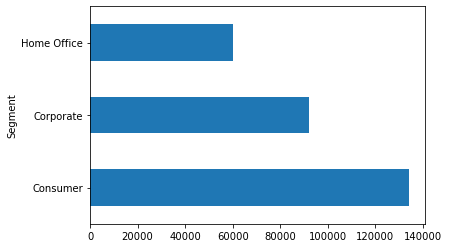

In [82]:
profit_by_segment = retail.groupby("Segment")["Profit"].sum()
print(profit_by_segment)
profit_by_segment.plot(kind="barh");

#### What the total Profit by Category?

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


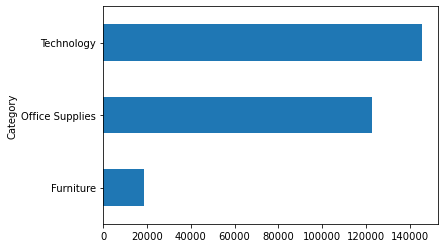

In [83]:
profit_by_category = retail.groupby("Category")["Profit"].sum()
print(profit_by_category)
profit_by_category.plot(kind="barh");

#### Top & Least 10 Profitable States?

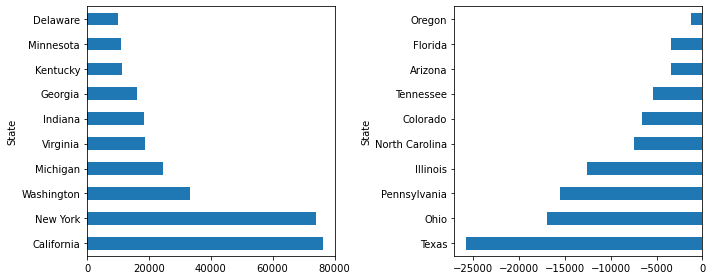

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
(
    retail.groupby("State")["Profit"].sum().sort_values()
    .nlargest(10).plot.barh(figsize=(10, 4), ylabel="Profit", ax=ax1)
)
(
    retail.groupby("State")["Profit"].sum().sort_values()
    .nsmallest(10).plot.barh(figsize=(10, 4), ylabel="Profit", ax=ax2)
)

fig.tight_layout()

#### Profit by Segment and Region?

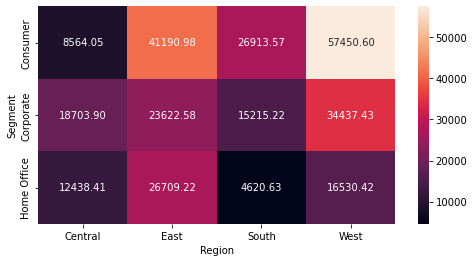

In [125]:
plt.figure(figsize=(8, 4))
sns.heatmap(retail.groupby(["Segment", "Region"])["Profit"].sum().unstack(), annot=True, fmt=".2f");

#### Profit by Sub-Category?

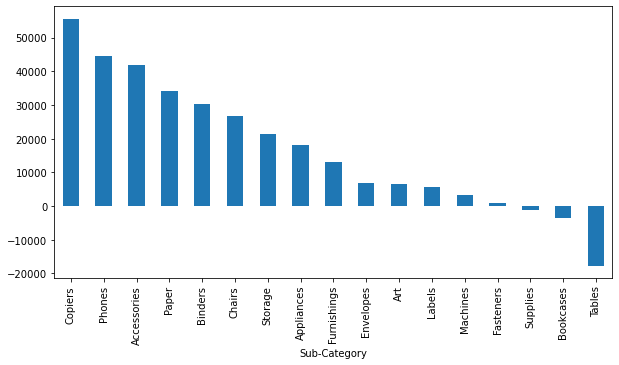

In [134]:
retail.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).plot.bar(figsize=(10, 5));

#### Profit by Shipping Mode?

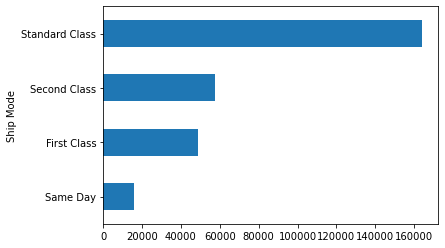

In [137]:
retail.groupby("Ship Mode")["Profit"].sum().sort_values().plot.barh();

**Key Insights**
 - The Most Profitable Segement is the **Consumer** as it has a Profit value of around **134K \$**.
 - The Most Protitable State in US is **California** wiht approximatly **80K \$**.
 - The Most Profitable Item Category is **Technoloicy** with approximatlly Profit value around **145K \$**
 - The Most Profitable Shipping Mode is **Standard Class** with approximatlly Profit value around **160K \$**
 - The Most Profitable Segment and Regein are (**West & Consumer**) with value around **57K**
 - The Least Profitable Segment and Regein are (**South & Home Office**) with value around **4K**
 - The Least Profitable State is **Texas**.